# Red Neuronal

Tutorial del descenso de gradiente por Alba Reinders Sánchez y Alejandro Valverde Mahou siguiendo el tutorial de  [Dot CSV](https://www.youtube.com/watch?v=W8AeOXa_FqU&list=PL-Ogd76BhmcCO4VeOlIH93BMT5A_kKAXp&index=4)

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

## Problema a resolver

El problema consiste en una clasificación donde los datos están distribuidos de forma circular

### Crear el DATASET

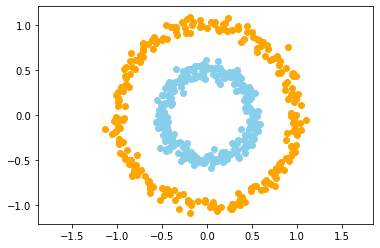

In [2]:
n = 500 #número de registros de los datos
p = 2 #número de características de cada dato

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05) #factor es la distancia entre los círculos

plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c = "orange")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c = "skyblue")
plt.axis("equal")
plt.show()

### Crear una clase para las capas

Recibirá por parámetro:

1. *n_conn*: el número de conexiones de la capa
2. *n_neur*: número de neuronas de la capa
3. *act_f*: función de activación de la capa

In [3]:
class neural_layer():
    def __init__(self, n_conn, n_neur, act_f):
        
        self.act_f = act_f
        self.b = np.random.rand(1, n_neur) * 2 -1 #valor aleatorio entre -1 y 1
        self.W = np.random.rand(n_conn, n_neur) * 2 -1 #valor aleatorio entre -1 y 1

### Crear funciones de activación

**Función Sigmoide**: $\frac{1}{1+e^{-x}}$

***Función derivada de Sigmide***: $\frac{1}{1-x}$

**Función RELU**: $\max(0, x)$

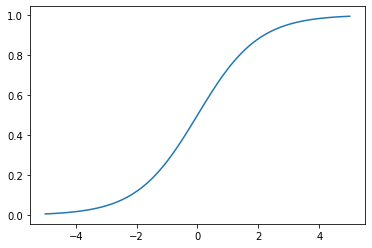

In [4]:
#Función sigmoide

sigm = (lambda x: 1 / (1 + np.e ** (-x)), 
        lambda x: x * (1-x))

_x = np.linspace(-5, 5, 100)

plt.plot(_x, sigm[0](_x))
plt.show()

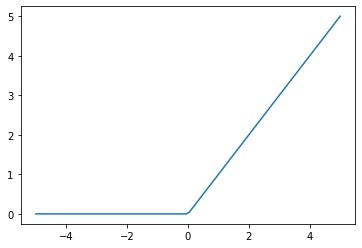

In [5]:
#Función RELU

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)

plt.plot(_x, relu(_x))
plt.show()

## Crear la Red Neuronal

Compuesta de las distintas **capas**

In [6]:
#capa 0
#l0 = neural_layer(p, 4, sigm)
#capa 1
#l1 = neural_layer(4, 8, sigm)


        

In [ ]:
def create_nn(topology, act_f):
    
    #Estructura de datos para las capas de la red de neuronas
    #Está compuesta por objetos de la clase 'neural_layer'
    nn = []
    
    #En 'l' se guarda el índice y en 'layer' el valor de 'topology' correspondiente 
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l], topology[l+1], act_f))
        
    return nn


In [11]:
#Topología de la red de neuronas, número de neuronas por capa
topology = [p, 4, 8, 16, 8, 4, 1]      
neural_net = create_nn(topology, sigm)

### Crear la lógica de la red neuronal

Entrenamiento de la red neuronal, consistente en 3 pasos:
1. Procesamiento hacia delante por todas las capas hasta llegar al final y devolver un valor, inicialmente aleatorio en la neurona final.<br><br>
2. Una vez tiene el resultado, compara con el resultado real o esperado, haciendo uso de la función de coste, y devuelve el error generado para hacer *backpropagation*, una propagación hacia atrás para calcular las derivadas parciales que permite obtener la información necesaria para ejecutar el algoritmo del **Descenso de Gradiente**.<br><br>
3. El **Descenso de Gradiente** permite optimizar la función de coste y *entrenar* la neurona.


#### Error Cuadrático Medio

$\frac{\displaystyle\sum_{i = 1}^{n}{(Yp_i - Yr_i)^2}}{n}$

#### Derivada del Error Cuadrático Medio

$Yp - Yr$

In [10]:
#Función de coste con el error cuadrático medio
#'Yp' -> 'Y' predicha
#'Yr' -> 'Y' real
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))
           

In [ ]:
#Recibe por parámetro la red neuronal, los valores de entrada, la salida real,
#la función de coste y el ratio de aprendizaje
#Esta función es la encargada de hacer que la red de neuronas 'aprenda'
def train(neural_net, X, Y, l2_cost, lr=0.5):
    
    #'Forward pass' Paso 1
    